<a href="https://colab.research.google.com/github/JJay1010/sw-team_project/blob/main/%ED%99%A9%ED%98%84%ED%83%9C/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try_1 =[1,2,3,4]
from random import randrange
print(try_1)
try_1.insert(3,9)
print(try_1)
try_1.insert(randrange(len(try_1)+1), 7)
print(try_1)

[1, 2, 3, 4]
[1, 2, 3, 9, 4]
[1, 7, 2, 3, 9, 4]


In [ ]:
print(len(try_1))
ss= randrange(len(try_1)+1)
print(ss)


6
4


# load numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/ai/dog/test/Mu01_rs.npy"
val_dir = "/content/drive/MyDrive/ai/dog/val/val_Mu01.npy"

import numpy as np
train_np = np.load(train_dir)
val_np = np.load(val_dir)

print(len(train_np))
print(len(val_np))

# label extraction

In [ ]:
!mkdir skel
!mkdir skel/train

!cd '/content/skel/train'
!unzip -qq "/content/drive/MyDrive/ai/dog/TL2_DOG.zip" -d '/content/skel/train' 

!mkdir skel/val
!cd '/content/skel/val'
!unzip -qq "/content/drive/MyDrive/ai/dog/VL2_DOG.zip" -d '/content/skel/val' 

In [ ]:
import glob
dir_ltrain = '/content/skel/train'
dir_lval = '/content/skel/val'

json_dir_path = dir_ltrain
json_path_list = sorted(glob.glob(json_dir_path+'/*'))
print(len(json_path_list))

113725


In [ ]:
import json

#
file_path_2 = json_path_list
#

file_name_t = []
disease_t = []
dis_name = []
pose = []
point_loc_t = []
for name in file_path_2:
  with open(name, 'r') as file:
      data = json.load(file)
      #print(type(data))
      #print(data)
      file_name_t.append(data["fileName"][:-5])
      disease_t.append(data['metadata']["Disease"])
      dis_name.append(data['metadata']["Disease-Name"])
      pose.append(data['metadata']["Position"])
      point_loc_t.append(data['annotations'][0]['points'])

In [ ]:
import pandas as pd

data = {'disease':disease_t , 'disease-name' : dis_name, 'position' : pose}
df = pd.DataFrame( data , index = file_name_t , columns = ['disease', 'disease-name', 'position'])

In [ ]:
df[df['disease-name'] == 'Mu01']['disease'] == 'NOR'
print(np.unique(df['disease']))

['ABN' 'NOR']


In [ ]:
df[(df['disease-name'] == 'Mu01') & (df['disease'] == 'ABN')]

,disease,disease-name,position
D_62_20000105_SF_0029_ABN_Mu01_20060116_0016,ABN,Mu01,AP
D_62_20000114_IM_0029_ABN_Mu01_20070113_0033,ABN,Mu01,AP
D_62_20000122_SF_0029_ABN_Mu01_20040118_0007,ABN,Mu01,AP
D_62_20000126_CM_0029_ABN_Mu01_20050110_0003,ABN,Mu01,AP
D_62_20000301_SF_0029_ABN_Mu01_20040120_0002,ABN,Mu01,ML
...,...,...,...
D_62_20140408_IM_0013_ABN_Mu01_20211213_0053,ABN,Mu01,AP
D_62_20140430_IF_0011_ABN_Mu01_20211210_0255,ABN,Mu01,ML
D_62_20140617_IM_0014_ABN_Mu01_20210619_0003,ABN,Mu01,AP
D_62_20150416_CM_0020_ABN_Mu01_20210806_0001,ABN,Mu01,ML


In [ ]:
df[df['disease-name'] == 'Mu01'].index

Index(['D_62_19980513_IF_0028_NOR_Mu01_20211216_0165',
       'D_62_19980513_IF_0028_NOR_Mu01_20211216_0167',
       'D_62_19980513_IF_0028_NOR_Mu01_20211216_0168',
       'D_62_19980513_IF_0028_NOR_Mu01_20211216_0169',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0173',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0174',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0175',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0176',
       'D_62_19980623_IM_0028_NOR_Mu01_20211216_0177',
       'D_62_19980710_IM_0028_NOR_Mu01_20211216_0179',
       ...
       'D_62_20171118_IF_0012_NOR_Mu01_20210518_0925',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0001',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0471',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0472',
       'D_62_20171120_IF_0013_NOR_Mu01_20201120_0575',
       'D_62_20171122_IF_0030_NOR_Mu01_20211214_2083',
       'D_62_20171123_CM_0020_NOR_Mu01_20211213_0538',
       'D_62_20171123_IF_0020_NOR_Mu01_20191123_0004',

In [ ]:

    print('d')

d


In [ ]:
NOR_list = []
ABN_list = []
for i in range(len(df[df['disease-name'] == 'Mu01'].index)):
  check = df[df['disease-name'] == 'Mu01'].index[i]
  if  df[(df['disease-name'] == 'Mu01') & (df['disease'] == 'ABN')].index.__contains__(df[df['disease-name'] == 'Mu01'].index[i]):
    ABN_list.append(i)
  else:
    
    NOR_list.append(i)

  

In [ ]:
print(len(NOR_list))
print(len(ABN_list))

24981
91


In [ ]:
train_set = []

for j in range(len(train_np)):
  value = []
  label = 0    # 0=NOR
  if j in NOR_list:
    value.append(label)
    value.append(train_np[j])
  else:
    label = 0
    value.append(label)
    value.append(train_np[j])
  train_set.append(value) 

#train


In [ ]:
#train_dir = "/content/drive/MyDrive/ai/dog/test/Mu01_rs.npy"
#val_dir = "/content/drive/MyDrive/ai/dog/val/val_Mu01.npy"
Mu01_t_x = '/content/drive/MyDrive/ai/dog/test/Mu01_t_x.npy'
Mu01_t_y = '/content/drive/MyDrive/ai/dog/test/Mu01_t_y.npy'

import numpy as np
Mu01_t_x = np.load(Mu01_t_x)
Mu01_t_y = np.load(Mu01_t_y)

print(len(Mu01_t_x))

25072


In [ ]:
#Mu01_t_y.value_counts()
print(Mu01_t_x.shape)

(25072, 224, 224, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Mu01_t_x, Mu01_t_y, test_size = 0.3)
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
y_train[:50]

#efficientNet

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from tensorflow.keras import applications
from tensorflow.keras import layers
import tensorflow as tf

def efficientNet_all_frz_model():
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights = 'imagenet')
  base_model.trainable = False

  #base_model.summary()
  # pretrained model의 category와 유사하지 않다고 생각하여 전체 레이어를 동결 후 학습
  # top <- false 이기 때문에 concatenate까지 하고 모델은 종료
  # flatten 대신 GlobalAveragePooling2D()

  flat_layer = layers.GlobalAveragePooling2D()(base_model.output)
  output = layers.Dense(1, activation = 'sigmoid')(flat_layer)

  model = tf.keras.models.Model(base_model.input, output)
  return model

#model.summary()

# def dense_model():
#   base_model = tf.keras.applications.DenseNet169(include_top = False, weights = 'imagenet')  # category 유사도 떨어져 layer 동결
#   # top <- false 이기 때문에 concatenate까지 하고 모델은 종료
#   base_model.trainable = False

#   flat_layer = layers.GlobalAveragePooling2D()(base_model.output)
#   output = layers.Dense(1, activation = 'sigmoid')(flat_layer)
#   model = tf.keras.models.Model(base_model.input, output)
#   return model





In [7]:
model = efficientNet_all_frz_model()
#model.summary()

In [2]:
model = dense_model()

In [3]:
train_dir = "/content/drive/MyDrive/ai/dog/test" + "/light_aug"

Mu01_t_x = train_dir + '/' + 'Mu05_x_data_tr_ch_1000.npy'
Mu01_t_y = train_dir + '/' + 'Mu05_y_data_tr_ch_1000.npy'
#Mu01_v_x = train_dir + '/' + 'Mu01_x_data_val_1000.npy'
#Mu01_v_y = train_dir + '/' + 'Mu01_y_data_val_1000.npy'

In [6]:
import numpy as np
x_set = np.load(Mu01_t_x)
y_set = np.load(Mu01_t_y)

In [ ]:
#x_set = x_set / 255.0
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

del(x_set)
del(y_set)

In [ ]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

#fine tuning fit 

model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 32) # 32-4까지

In [ ]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 32) # 32-4까지

In [8]:
custom_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)  #0.0001
model.compile(optimizer=custom_adam, loss='mse', metrics=['mae'])
##model.compile(optimizer=custom_adam, loss='binary_crossentropy', metrics=['mae'])

history = model.fit(x_set, y_set, epochs = 30, batch_size = 32) # 32-4까지    32, 16

Epoch 1/30
149/393 [==========>...................] - ETA: 11:27 - loss: 0.2494 - mae: 0.4858

KeyboardInterrupt: ignored

In [6]:
del(x_set)
del(y_set)

In [7]:
#del(x_set)
#del(y_set)

train_dir = "/content/drive/MyDrive/ai/dog/test"

Mu01_t_x = train_dir + '/' + 'Mu05_x_data_val_1000.npy'
Mu01_t_y = train_dir + '/' + 'Mu05_y_data_val_1000.npy'

x_test = np.load(Mu01_t_x)

y_test = np.load(Mu01_t_y)

78/78 [==============================] - 4s 55ms/step


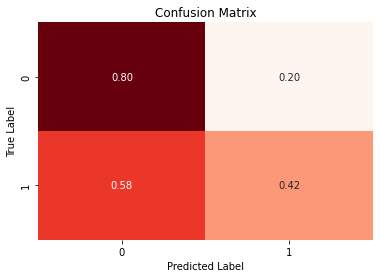

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the validation data
y_pred = model.predict(x_test)

y_pred_discrete = np.round(y_pred)
# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_discrete)  # y_val이 ground truth

# Normalize the confusion matrix to get the ratios
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix using Seaborn
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
aa=[0, 1, 2, 3]
for i in range(4):
  
  if aa[i]==1:
    continue
  print(i)
  
  if aa[0]==0:
    print('sss')
    

0
sss
2
sss
3
sss


In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred_discrete )
print(matrix)

In [ ]:
import random
drop_t = [2,3,4, 6, 8]
try_1 = [[1], [2],[5],[7],[15],[26],[37],[48],[59]]
#remo = sorted(random.sample(try_1,5))
y_d = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]

for i in range(len(drop_t)):
    #aa= (drop_t[-i-1])
    #try_1[aa].clear()
    del try_1[drop_t[-i-1]]
    del y_d[drop_t[-i-1]]
    
    #del try_1[remo[-i-1]]

print(try_1)
print(y_d)

[[1], [2], [26], [48]]
[1, 2, 6, 8, 0]


In [ ]:
# f1 score
beta = 2
TN = conf_mat_norm[0][0]
FP = conf_mat_norm[0][1]
FN = conf_mat_norm[1][0]
TP = conf_mat_norm[1][1]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("Pricision", Precision)
print('Recall', Recall)
print("F1", (1+beta**2)*(Precision*Recall)/((beta**2*Precision)+Recall))

Pricision 0.9993869609254225
Recall 0.21739130434782608
F1 0.25772380970710423


In [ ]:
#x_train, x_test, y_train, y_test
del(x_train)
del(x_test)
del(y_train)
del(y_test)

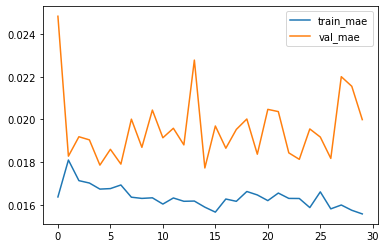

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label = 'train_mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.legend()

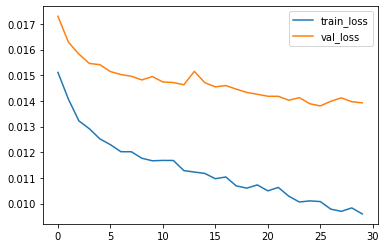

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
     

In [ ]:
!mkdir /content/drive/MyDrive/ai/dog/Mu05

In [ ]:
model.save('/content/drive/MyDrive/ai/dog/Mu05')

# data 크기 줄이기
- 비정상 횟수에 맞게 줄이기
- 측면만 사용

In [ ]:
# 2시 팀미팅

#DenseNet161

In [ ]:
import os                
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.models as models
import torchvision.transforms as transforms
 
from PIL import Image
from pathlib import Path
from PIL import ImageFile
from torchvision import datasets

batch_size = 128
IMAGE_SIZE = 224
 
MEANS = [0.485, 0.456, 0.406]
DEVIATIONS = [0.229, 0.224, 0.225]

In [ ]:
# transforms
train_transform = transforms.Compose([transforms.RandomRotation(30), # 이미지를 랜덤으로 30도 각도로 회전
                                      transforms.RandomResizedCrop(IMAGE_SIZE, scale=(0.08, 1.0), ratio=(0.75, 1.33)), # 이미지 사이즈 변경
                                      transforms.ToTensor(), # 데이터 타입을 Tensor 형태로 변경
                                      transforms.Normalize(MEANS, DEVIATIONS) # 데이터 정규화
                                      ])
 
test_transform = transforms.Compose([transforms.Resize(IMAGE_SIZE), # IMAGE_SIZE로 이미지 사이즈 변경
                                      transforms.CenterCrop(IMAGE_SIZE), # 이미지를 square하게 변경
                                      transforms.ToTensor(), # 데이터 타입을 Tensor 형태로 변경
                                      transforms.Normalize(MEANS, DEVIATIONS) # 데이터 정규화
                                      ])
 
# Image folder
training = datasets.ImageFolder("./train", transform=train_transform) # ImageFolder를 사용해 dataset 생성
testing = datasets.ImageFolder("./test", transform=test_transform) # ImageFolder를 사용해 dataset 생성
 
# DataLoader
train_batches = torch.utils.data.DataLoader(training, batch_size=batch_size, shuffle=True) # train_loader 생성
test_batches = torch.utils.data.DataLoader(testing, batch_size=batch_size) # test 데이터는 batch사이즈 맞춰 그대로
 
model_transfer = models.densenet161(pretrained=True).cuda()
 
for param in model_transfer.parameters():
  param.requires_grad = False # requires_grad를 사용해 parameter 동결
 
model_transfer.classifier = nn.Linear(model_transfer.classifier.in_features, 20) # 마지막 layer을 BREEDS개의 class로 분류하도록 재정의
# 이 때, requires_grad 옵션은 True
 
nn.init.kaiming_normal_(model_transfer.classifier.weight, nonlinearity='relu') # 재정의한 layer의 weight를 initialize
 
print(model_transfer.classifier)
 
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()
 
criterion_transfer = nn.CrossEntropyLoss() 
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr=0.001, betas=[0.9, 0.999])
 
def train(n_epochs, train_loader, model, optimizer, criterion, use_cuda):  
    train_losses = []
    train_loss_min = np.Inf
 
    for epoch in range(1, n_epochs+1): # epoch만큼 반복
        # traing_loss와 valid_loss를 저장하기 위한 변수 선언
        train_loss = 0.0
 
        model.train() # 모델 training 
        for data, target in train_loader:
            if use_cuda:
                data, target = data.cuda(), target.cuda() # gpu에서 연산을 수행하기 위해
 
            optimizer.zero_grad() # 모든 model의 gradient 값을 0으로 설정
            output = model(data) # 모델을 forward pass해 결과값 저장 
            loss = criterion(output, target) # output과 target의 loss 계산
            loss.backward() # backward 함수를 호출해 gradient 계산
            optimizer.step() # 모델의 학습 파라미터 갱신
            train_loss += loss.item() * data.size(0) # loss값을 train에 더함 (나중에 loss의 평균을 구하기 위해 data.size를 곱함)
        
        train_loss = train_loss/len(train_loader.dataset) # 전체 train loader의 크기로 나눔
        train_losses.append(train_loss) # 결과를 plot할때 사용하기 위해 list에 값을 append
        
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch, train_loss))     
        
        if train_loss <= train_loss_min: # 더 좋은 결과가 나온 경우
            print('Train loss decreased {:.6f} --> {:.6f}. Saving model ...'.format(train_loss_min, train_loss))
            torch.save(model.state_dict(), 'model_transfer.pth')
            train_loss_min = train_loss # 최저 loss를 갱신함
        
    return model, train_losses
 
epochs = 300
 
model_transfer, train_losses = train(epochs, train_batches, model_transfer, optimizer_transfer, criterion_transfer, use_cuda)
 
model_transfer.load_state_dict((torch.load('model_transfer.pth'))) # test결과가 가장 좋았던 model을 불러와 저장
 
# loss값 그래프 출력
plt.plot(train_losses, label="Training loss")
plt.legend(frameon=False)
plt.grid(True)
 
def test(test_loader, model, criterion, use_cuda):
    class_correct = 0.
    class_total = 0.
    test_loss = 0.
 
    model.eval()
    for data, target in test_loader:
        if use_cuda:
          data, target = data.cuda(), target.cuda()
        output = model(data)  # 모델을 forward pass해 결과값 저장 
        loss = criterion(output, target) # output과 target의 loss 계산
        test_loss += loss.item() * data.size(0) # loss값을 test_loss에 더함 
        _, pred = torch.max(output, 1) # 출력이 분류 각각에 대한 값으로 나타나기 때문에, 가장 높은 값을 갖는 인덱스를 추출
        correct_tensor = pred.eq(target.data.view_as(pred)) # pred.eq를 사용해서 예측값과 실제값이 같은지 비교
         # gpu tensor는 numpy로 계산할 수 없기 때문에, 조건문을 사용해 cpu에서 계산되도록 함
        class_correct += np.sum(np.squeeze(correct_tensor.numpy())) if not use_cuda else np.sum(np.squeeze(correct_tensor.cpu().numpy()))
        class_total += data.size(0) # 전체 클래스 개수 
 
    test_loss = test_loss/len(test_loader.dataset) # test loss의 평균 계산
 
    # 결과 출력
    print('Test Loss: {:.6f}\n'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * class_correct / class_total, class_correct, class_total))
 
test(test_batches, model_transfer, criterion_transfer, use_cuda) # test메소드 사용
 
class_names = [item[0:].replace("_", " ") for item in train_batches.dataset.classes] # class 목록 list를 저장
 
train_batches.dataset.classes[:6] # class 목록 출력
 
def image_loader(img_path, transform, use_cuda):
    image = Image.open(img_path).convert('RGB')
    img = transform(image)[:3,:,:].unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    return img
 
def predict_food_transfer(model, class_names, img_path):
    logit = model_transfer(image_loader(img_path, test_transform, True))
    idx = torch.max(logit,1)[1].item()
 
    return class_names[idx]
 
dirs = os.listdir('myimg')
 
for img_file in dirs:
    img_path = os.path.join('myimg', img_file)
    predition = predict_food_transfer(model_transfer, class_names, img_path)    
    print("image_file_name = {0}, \t predition food: {1}" .format(img_path, predition))
    img = Image.open(img_path).convert("RGB")
    plt.imshow(img)
    plt.show()
